# Design a MLP to classify two clusters of data (x1, x2) drawn from Normal(2, 1) and Normal(-2, 1) 

Ref: 莫煩 Moven  https://www.youtube.com/watch?v=Qm3zzq-xeDI&index=12&list=PLXO45tsB95cJxT0mL0P3-G0rBcLSvVkKH

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display

# 1. Practice data generation

## 1.1. generate a [5, 1] tensor with 5 random numbers drawn from Normal(0, 1)

In [2]:
x = torch.zeros(5, 1) 
print(x)
x = torch.normal(x, 1)
print(x)


 0
 0
 0
 0
 0
[torch.FloatTensor of size 5x1]


-0.7708
 0.4361
-1.0639
-0.6588
-1.2212
[torch.FloatTensor of size 5x1]



http://pytorch.org/docs/master/torch.html?highlight=normal#torch.normal

torch.normal(means, std, out=None) → Tensor
Returns a tensor of random numbers drawn from separate normal distributions whose mean and standard deviation are given.

torch.normal(means, std=1.0, out=None) → Tensor
Similar to the function above, but the standard-deviations are shared among all drawn elements.

## 1.2. generate a [5, 1] tensor with 5 random numbers drawn from Normal(3, 2)

In [3]:
x = torch.ones(5, 1) 
print(x)
x = torch.normal(3*x, 2)
print(x)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5x1]


 3.6988
 3.5368
 2.9098
-1.0048
 4.4155
[torch.FloatTensor of size 5x1]



# 2. Practice merge two matrex

## 2.1.  Merge rows 

In [4]:
x = torch.zeros(5, 1) 
x = torch.normal(x, 1)
y = torch.ones(5, 1) 
y = torch.normal(3*y, 2)
z = torch.cat((x, y), 0).type(torch.FloatTensor)
print(x, y, z)


-0.0333
 0.8102
 1.0497
 0.6389
-1.3024
[torch.FloatTensor of size 5x1]
 
 3.5905
 3.9125
 3.4925
 4.1425
 8.6193
[torch.FloatTensor of size 5x1]
 
-0.0333
 0.8102
 1.0497
 0.6389
-1.3024
 3.5905
 3.9125
 3.4925
 4.1425
 8.6193
[torch.FloatTensor of size 10x1]



## 2.2.  Merge columns 

In [5]:
x = torch.zeros(5, 1) 
x = torch.normal(x, 1)
y = torch.ones(5, 1) 
y = torch.normal(3*y, 2)
z = torch.cat((x, y), 1).type(torch.FloatTensor)
print(x, y, z)


-0.6260
-1.0323
-0.2977
-1.1827
-0.1187
[torch.FloatTensor of size 5x1]
 
-2.8310
-0.1346
 4.9754
 3.6504
 1.1182
[torch.FloatTensor of size 5x1]
 
-0.6260 -2.8310
-1.0323 -0.1346
-0.2977  4.9754
-1.1827  3.6504
-0.1187  1.1182
[torch.FloatTensor of size 5x2]



# Cluster 1: X0 = (x1, x2) from Normal(2, 1), Y0=0

In [6]:
n_data = torch.ones(3, 2) # float tensor of size 100x2

In [7]:
n_data.shape

torch.Size([3, 2])

In [8]:
x0 = torch.normal(2*n_data, 1) # x, y coordinates for class 0

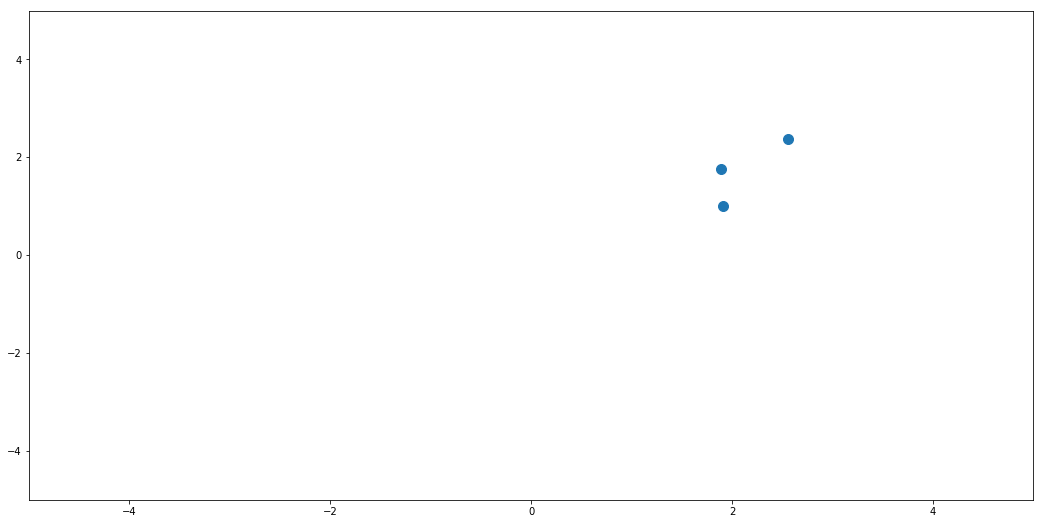

In [9]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x0.numpy()[:, 0], x0.numpy()[:, 1], s=100)
plt.axis([-5, 5, -5, 5]) #minX, maxX, minY, maxY
plt.show()

In [10]:
y0 = torch.zeros(3) # label of x0 = 0

# Cluster 2: X1 = (x1, x2) from Normal(2, 1), Y1=1

In [11]:
x1 = torch.normal(-2*n_data, 1)  # x, y coordinates for class 1

In [12]:
x1.shape

torch.Size([3, 2])

In [13]:
y1 = torch.ones(3) # label of x1

In [14]:
y1.shape

torch.Size([3])

# Training data: X = X0+X1,  Y=Y0+Y1

In [15]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) # merge class 0, 1 data into training set

In [16]:
x.shape

torch.Size([6, 2])

In [17]:
y = torch.cat((y0, y1), ).type(torch.LongTensor) # merge class 0, 1 labels 

In [18]:
y.shape

torch.Size([6])

In [19]:
x, y = Variable(x), Variable(y)

In [20]:
print(x.shape, y.shape)

torch.Size([6, 2]) torch.Size([6])


In [21]:
x[0].data.numpy()

array([1.894982 , 1.7603436], dtype=float32)

In [22]:
x.data.numpy()[0]

array([1.894982 , 1.7603436], dtype=float32)

In [23]:
x.data.numpy()[0][1]

1.7603436

In [24]:
y.data.numpy()

array([0, 0, 0, 1, 1, 1], dtype=int64)

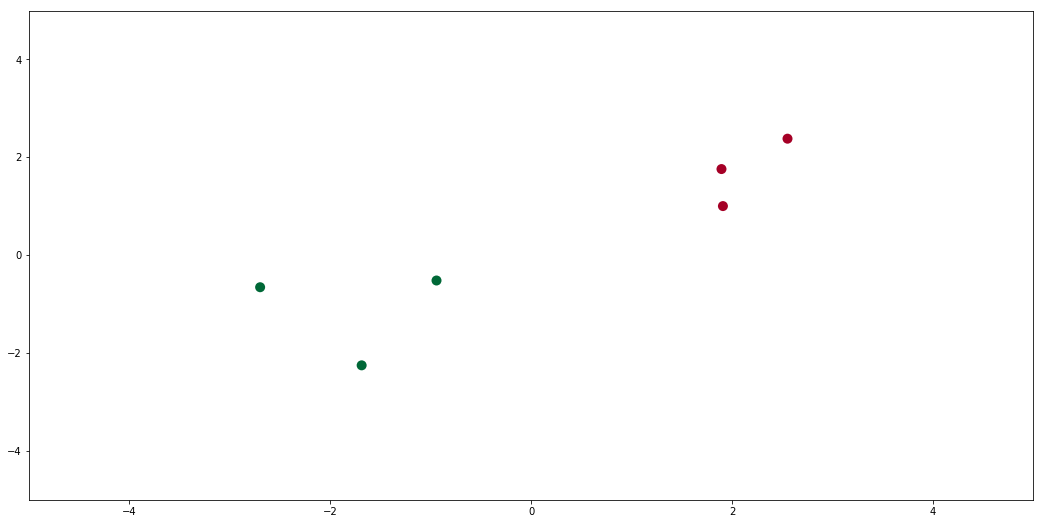

In [25]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.axis([-5, 5, -5, 5]) #minX, maxX, minY, maxY
plt.show()

# Define neural network

In [26]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

# Build a MLP with 1 hidden layer with 10 neurons

In [27]:
net = Net(2, 4, 2)

In [28]:
net

Net(
  (hidden): Linear(in_features=2, out_features=4)
  (predict): Linear(in_features=4, out_features=2)
)

# Define optimization parameters

In [29]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

In [30]:
loss_func = torch.nn.CrossEntropyLoss()

# Manually run the first epoc of the training loop

### forward propogation to calculate loss

In [31]:
x

Variable containing:
 1.8950  1.7603
 2.5523  2.3812
 1.9093  1.0035
-2.6983 -0.6549
-1.6876 -2.2515
-0.9423 -0.5176
[torch.FloatTensor of size 6x2]

In [32]:
out = net(x)
print(out)

Variable containing:
 0.6719 -0.3668
 0.9156 -0.4203
 0.4080 -0.1310
-0.0619 -0.5555
 0.1153 -0.3787
-0.0559 -0.3535
[torch.FloatTensor of size 6x2]



In [33]:
loss = loss_func(out, y)
print('loss = ', loss)

loss =  Variable containing:
 0.6316
[torch.FloatTensor of size 1]



In [34]:
loss.data.numpy()

array([0.6315754], dtype=float32)

In [35]:
loss.data.numpy()[0]

0.6315754

### use softmax to predict the label 0 or 1

In [36]:
tmp = F.softmax(out, 0)  # rows sum up to 1 
print(tmp)

Variable containing:
 0.2183  0.1655
 0.2786  0.1569
 0.1677  0.2095
 0.1048  0.1370
 0.1251  0.1635
 0.1054  0.1677
[torch.FloatTensor of size 6x2]



In [37]:
tmp = F.softmax(out, 1) # columns sum up to 1 
print(tmp)

Variable containing:
 0.7386  0.2614
 0.7918  0.2082
 0.6316  0.3684
 0.6210  0.3790
 0.6211  0.3789
 0.5739  0.4261
[torch.FloatTensor of size 6x2]



In [38]:
torch.max(F.softmax(out, 1))  # find the max value of the whole table

Variable containing:
 0.7918
[torch.FloatTensor of size 1]

In [39]:
torch.max(F.softmax(out, 1), 0) # find the max value of rows with their indices

(Variable containing:
  0.7918
  0.4261
 [torch.FloatTensor of size 2], Variable containing:
  1
  5
 [torch.LongTensor of size 2])

In [40]:
torch.max(F.softmax(out, 1), 1) # find the max value of each row with their indices

(Variable containing:
  0.7386
  0.7918
  0.6316
  0.6210
  0.6211
  0.5739
 [torch.FloatTensor of size 6], Variable containing:
  0
  0
  0
  0
  0
  0
 [torch.LongTensor of size 6])

Returns the maximum value of each row of the input tensor in the given dimension dim. The second return value is the index location of each maximum value found (argmax).

In [41]:
prediction = torch.max(F.softmax(out, 1), 1)[1]  
print(prediction)

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.LongTensor of size 6]



### calculate accuracy

In [42]:
pred_y = prediction.data.numpy()
print(pred_y)

[0 0 0 0 0 0]


In [43]:
pred_y.squeeze() 

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
import numpy as np
np.squeeze(pred_y)

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
pred_y = prediction.data.numpy().squeeze()

In [46]:
target_y = y.data.numpy()
print(target_y)

[0 0 0 1 1 1]


In [47]:
sum(pred_y == target_y)

3

In [48]:
sum(pred_y == target_y)/6.0

0.5

### back propogation to update weights

In [49]:
optimizer.zero_grad()
loss.backward()
optimizer.step()

# Plot accuracy and loss

In [50]:
acculst = []
losslst = []
for t in range(30):
    out = net(x)
    loss = loss_func(out, y)
    losslst.append(loss.data.numpy()[0])

    prediction = torch.max(F.softmax(out, 1), 1)[1]   
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    accuracy = sum(pred_y == target_y)/6.0
    acculst.append(accuracy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

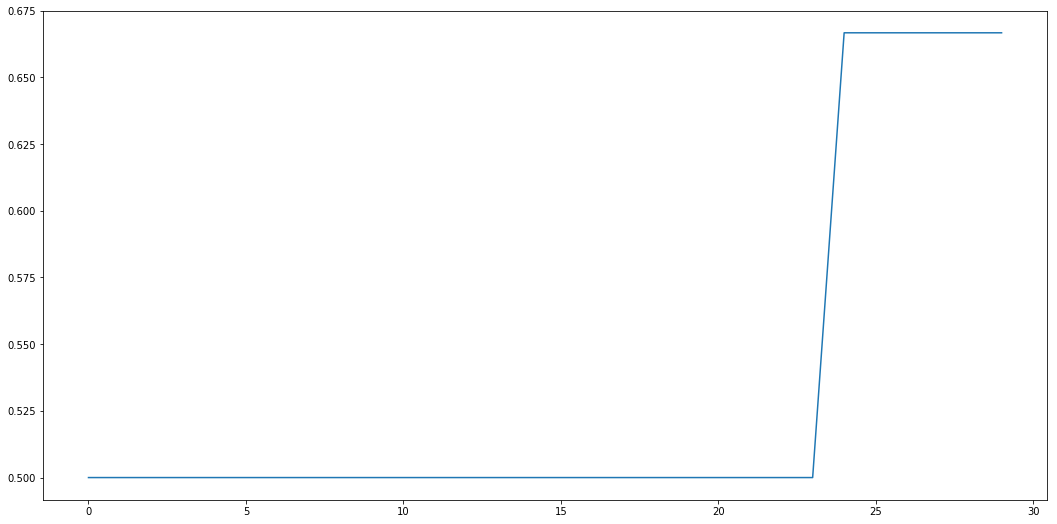

In [51]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(acculst)
plt.show()

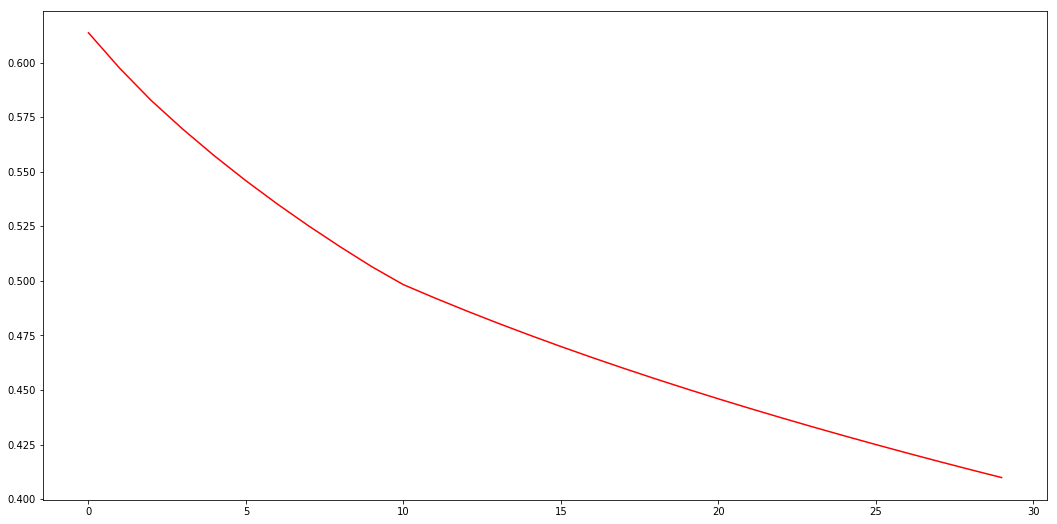

In [52]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()